<a href="https://colab.research.google.com/github/Daprosero/ProcesamientoImagenes2025/blob/main/3.Tareas%20cl%C3%A1sicas%20de%20visi%C3%B3n%20por%20computador/3_Segmentaci%C3%B3n_sem%C3%A1ntica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://medellin.unal.edu.co/eventos/panam2018/images/imagenes/organizan_2.png" width="40%">

# Procesamiento Digital de Imágenes

## Departamento de ingeniería eléctrica, electrónica y computación
## Sede Manizales

### Profesores Diego Pérez

# Segmentación de Imágenes: Semántica vs Instancias

##  ¿Qué es la segmentación de imágenes?
La segmentación consiste en dividir una imagen en regiones significativas. Existen dos tipos principales:

#### 1. Segmentación Semántica
Asigna una clase a **cada píxel** de la imagen. Todos los objetos de la misma clase comparten una etiqueta.
<img src="https://blogs.uoc.edu/informatica/wp-content/uploads/sites/153/2016/05/semantic_segmentation-1.png" width="100%">



### 2. Segmentación por Instancias
Asigna una clase a cada píxel **y además** distingue entre diferentes objetos de la misma clase. Por ejemplo, dos personas tendrán etiquetas separadas.
<img src="https://blogs.uoc.edu/informatica/wp-content/uploads/sites/153/2016/05/instance_aware_semantic_segmentation.png" width="100%">


# Ejemplo de Segmentación Semántica


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Cargar dataset con máscaras
dataset, info = tfds.load('oxford_iiit_pet:4.*.*', with_info=True)
train_ds = dataset['train'].map(lambda d: (tf.image.resize(d['image'], [128, 128]), tf.image.resize(d['segmentation_mask'], [128, 128])))
train_ds = train_ds.batch(8).prefetch(1)





Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.H12OBH_4.0.0/oxford_iiit_pet-train.tfrecord*...…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.H12OBH_4.0.0/oxford_iiit_pet-test.tfrecord*...:…

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/4.0.0. Subsequent calls will reuse this data.


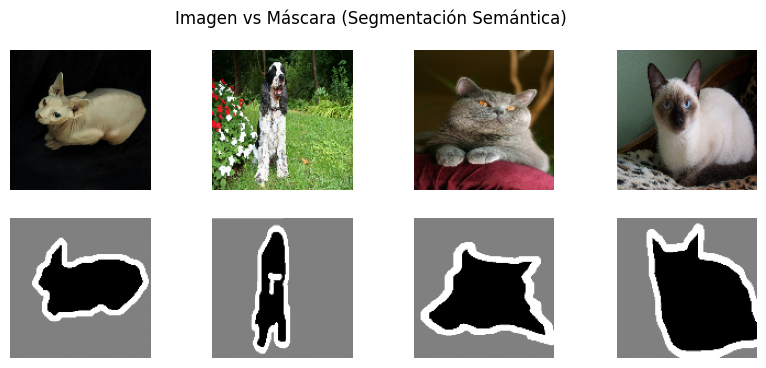

In [2]:
# Mostrar ejemplo
for image, mask in train_ds.take(1):
    plt.figure(figsize=(10, 4))
    for i in range(4):
        plt.subplot(2, 4, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.subplot(2, 4, i+5)
        plt.imshow(mask[i].numpy().squeeze(), cmap='gray')
        plt.axis('off')
    plt.suptitle("Imagen vs Máscara (Segmentación Semántica)")
    plt.show()

# Modelo U-Net simplificado para segmentación semántica

In [3]:
from tensorflow.keras import layers, Model
def unet_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    # Encoder
    x = layers.Conv2D(16, 3, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D()(x)
    # Decoder
    x = layers.Conv2DTranspose(32, 3, strides=2, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(16, 3, strides=2, activation='relu', padding='same')(x)
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(x)
    return Model(inputs, outputs)

model = unet_model((128, 128, 3))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 64, 64, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 128, 128, 16)   │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 1)    │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,977 (74.13 KB)

 Trainable params: 18,977 (74.13 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Entrenar (sólo unas pocas epochs para demostración)
model.fit(train_ds, epochs=3)

Epoch 1/3
460/460 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.2927 - loss: -697795648.0000
Epoch 2/3
460/460 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.2933 - loss: -142900772864.0000
Epoch 3/3
460/460 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.2933 - loss: -2145535262720.0000


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


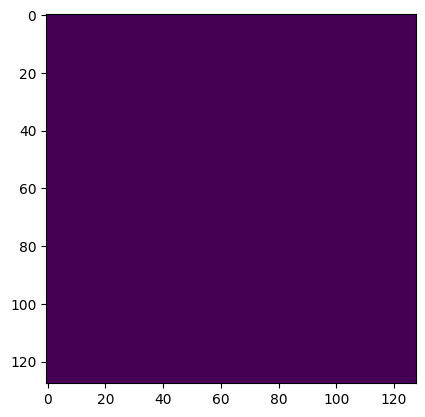

In [5]:
plt.imshow(model.predict(train_ds.take(1))[0,:,:,0])

#  Herramientas comunes:
- [Detectron2 (Facebook AI)](https://github.com/facebookresearch/detectron2): framework potente para segmentación por instancias.
- [SegFormer (Hugging Face)](https://huggingface.co/nvidia/segformer-b0-finetuned-ade-512-512): modelo transformer para segmentación semántica.
- [DeepLab (Google)](https://github.com/tensorflow/models/blob/master/research/deeplab/deeplab_demo.ipynb): arquitectura avanzada para segmentación semántica.
- [SOLO, YOLACT, Mask2Former](https://paperswithcode.com/task/instance-segmentation): arquitecturas modernas para segmentación por instancias.

Estos modelos requieren instalación y configuración personalizada (basados en PyTorch o MMDetection).
Recomendado usar sus notebooks o demos oficiales para pruebas.